# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Daan| secret |
|Sven| secret |
|Richard|secret|
|Sem|secret | 

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [2]:
# Voer deze cel altijd als eerste uit!
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
from rdflib.namespace import FOAF, RDFS
from rdflib import Graph
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Namespace, URIRef, Literal
from rdflib.namespace import RDF
%matplotlib inline

In [3]:
# Deze code is afkomstig van https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Om de code te zien/verbergen, klik hier!'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

In [4]:
# Deze cel bevat de familie Digraph (wordt opgeslagen als G)

H = nx.DiGraph()


# Relaties
def ouders(x, y, network=H):
    network.add_edge(x, y, ouder=True)


def vaders(x, y, network=H):
    if network.nodes[x]['M'] == True:
        try:
            if "ouder" in network[x][y]:
                network.add_edge(x, y, vader=True)
        except:
            pass


def moeders(x, y, network=H):
    if network.nodes[x]['V'] == True:
        try:
            if "ouder" in network[x][y]:
                network.add_edge(x, y, moeder=True)
        except:
            pass


def broers(x, y, network=H):
    if network.nodes[x]['M'] == True:
        for z in network.nodes:
            try:
                if "ouder" in network[z][x]:
                    try:
                        if "ouder" in network[z][y]:
                            network.add_edge(x,
                                             y,
                                             broer=True,
                                             )
                            break
                    except:
                        pass
            except:
                pass


def zussen(x, y, network=H):
    if network.nodes[x]['V'] == True:
        for z in network.nodes:
            try:
                if "ouder" in network[z][x]:
                    try:
                        if "ouder" in network[z][y]:
                            network.add_edge(x,
                                             y,
                                             zus=True,
                                             )
                            break
                    except:
                        pass
            except:
                pass


def zoons(x, y, network=H):
    if network.nodes[x]['M'] == True:
        try:
            if "ouder" in network[y][x]:
                network.add_edge(x, y, zoon=True)
        except:
            pass


def dochters(x, y, network=H):
    if network.nodes[x]['V'] == True:
        try:
            if "ouder" in network[y][x]:
                network.add_edge(x, y, moeder=True)
        except:
            pass


def opas(x, y, network=H):
    for z in network.nodes:
        try:
            if "vader" in network[x][z]:
                try:
                    if "ouder" in network[z][y]:
                        network.add_edge(x, y, opa=True)
                        break
                except:
                    pass
        except:
            pass


def omas(x, y, network=H):
    for z in network.nodes:
        try:
            if "moeder" in network[x][z]:
                try:
                    if "ouder" in network[z][y]:
                        network.add_edge(x, y, oma=True)
                        break
                except:
                    pass
        except:
            pass


def kleinzoons(x, y, network=H):
    if network.nodes[x]['M'] == True:
        try:
            if "opa" in network[y][x] or "oma" in network[y][x]:
                network.add_edge(x, y, kleinzoon=True)
        except:
            pass


def kleindochters(x, y, network=H):
    if network.nodes[x]['V'] == True:
        try:
            if "opa" in network[y][x] or "oma" in network[y][x]:
                network.add_edge(x, y, kleindochter=True)
        except:
            pass


def ooms(x, y, network=H):
    for z in network.nodes:
        try:
            if "broer" in network[x][z]:
                try:
                    if "ouder" in network[z][y]:
                        network.add_edge(x, y, oom=True)
                except:
                    pass
        except:
            pass


def tantes(x, y, network=H):
    for z in network.nodes:
        try:
            if "zus" in network[x][z]:
                try:
                    if "ouder" in network[z][y]:
                        network.add_edge(x,
                                         y,
                                         tante=True,
                                         )
                except:
                    pass
        except:
            pass


def neven(x, y, network=H):
    if network.nodes[x]['M'] == True:
        try:
            if "oom" in network[y][x] or "tante" in network[y][x]:
                network.add_edge(x, y, neef=True)
        except:
            pass


def nichten(x, y, network=H):
    if network.nodes[x]['V'] == True:
        try:
            if "oom" in network[y][x] or "tante" in network[y][x]:
                network.add_edge(x, y, nicht=True)
        except:
            pass


#Lijst familieleden
Mannen = {
    'Piet Slager', 'Kees van Mansom (Senior)', 'Kees van Mansom (Junior)',
    'Sven van Mansom', 'Theo Streng', 'Jan Verweij', 'Sven Verweij',
    'Derek Verweij', 'Roel Verweij', 'Joran Verweij', 'Max Verweij',
    'Gosse Verweij', 'Hielke Verweij', 'Tsjerk Verweij', 'Bouke Verweij',
    'Jeroen de Vries', 'Hans de Vries', 'Herman de Vries', 'Gerard Draaijer',
    'Bas Brouwer', 'Aart Brouwer', 'Ferdinand van der Blaak',
    'Rogier van der Blaak', 'Jan Prins', 'Ronald van der Blaak',
    'Ryan van Mansom', 'Alex Zwijnenburg', 'Daniël Zwijnenburg',
    'Fred Zwijnenburg', 'Simon Ooms', "Jan Zwijnenburg", "Rob Labordus"
}
Vrouwen = {
    'Alice Slager', 'Joke van den Beukel', 'Rietje Berkelaar',
    'Christine Streng', 'Nelleke Verweij', 'Edith Streng', 'Liesbeth Verweij',
    'Agaath de Vries', 'Jo Draaijer', 'Marthy de Vries-Beekman',
    'Margaretha Draaijer-Meeuwsse', 'Fredy Prins-de Vries',
    'Ada van der Blaak-de Vries', 'Anneloes Prins', 'Meike Prins',
    'Sylvia Labordus', 'Anneke Ooms', 'Simone Ooms', "Adriana Tielemans",
    "Loes Labordus", 'Daphne van Mansom'
}

# Gender attribute instellen
H.add_nodes_from(Mannen, M=True, V=False)
H.add_nodes_from(Vrouwen, M=False, V=True)

# Instellen rang 1 familie
ouders('Kees van Mansom (Junior)', 'Sven van Mansom')
ouders('Alice Slager', 'Sven van Mansom')

ouders('Rietje Berkelaar', 'Kees van Mansom (Junior)')
ouders('Kees van Mansom (Senior)', 'Kees van Mansom (Junior)')

ouders('Kees van Mansom (Junior)', 'Daphne van Mansom')
ouders('Alice Slager', 'Daphne van Mansom')

ouders('Kees van Mansom (Junior)', 'Ryan van Mansom')
ouders('Alice Slager', 'Ryan van Mansom')

ouders('Piet Slager', 'Alice Slager')
ouders('Joke van den Beukel', 'Alice Slager')

ouders('Sven Verweij', 'Joran Verweij')
ouders('Edith Streng', 'Joran Verweij')

ouders('Sven Verweij', 'Max Verweij')
ouders('Edith Streng', 'Max Verweij')

ouders('Jan Verweij', 'Sven Verweij')
ouders('Nelleke Verweij', 'Sven Verweij')

ouders('Christine Streng', 'Edith Streng')
ouders('Theo Streng', 'Edith Streng')

ouders('Jan Verweij', 'Roel Verweij')
ouders('Nelleke Verweij', 'Roel Verweij')

ouders('Jan Verweij', 'Derek Verweij')
ouders('Nelleke Verweij', 'Derek Verweij')

ouders('Roel Verweij', 'Gosse Verweij')
ouders('Liesbeth Verweij', 'Gosse Verweij')

ouders('Roel Verweij', 'Hielke Verweij')
ouders('Liesbeth Verweij', 'Hielke Verweij')

ouders('Roel Verweij', 'Tsjerk Verweij')
ouders('Liesbeth Verweij', 'Tsjerk Verweij')

ouders('Roel Verweij', 'Bouke Verweij')
ouders('Liesbeth Verweij', 'Bouke Verweij')

ouders('Agaath de Vries', 'Aart Brouwer')
ouders('Bas Brouwer', 'Aart Brouwer')

ouders('Hans de Vries', 'Agaath de Vries')
ouders('Jo Draaijer', 'Agaath de Vries')

ouders('Hans de Vries', 'Jeroen de Vries')
ouders('Jo Draaijer', 'Jeroen de Vries')

ouders('Herman de Vries', 'Hans de Vries')
ouders('Marthy de Vries-Beekman', 'Hans de Vries')

ouders('Gerard Draaijer', 'Jo Draaijer')
ouders('Margaretha Draaijer-Meeuwsse', 'Jo Draaijer')

ouders('Herman de Vries', 'Ada van der Blaak-de Vries')
ouders('Marthy de Vries-Beekman', 'Ada van der Blaak-de Vries')

ouders('Herman de Vries', 'Fredy Prins-de Vries')
ouders('Marthy de Vries-Beekman', 'Fredy Prins-de Vries')

ouders('Herman de Vries', 'Ada van der Blaak-de Vries')
ouders('Marthy de Vries-Beekman', 'Ada van der Blaak-de Vries')

ouders('Ada van der Blaak-de Vries', 'Rogier van der Blaak')
ouders('Ronald van der Blaak', 'Rogier van der Blaak')

ouders('Ada van der Blaak-de Vries', 'Ferdinand van der Blaak')
ouders('Ronald van der Blaak', 'Ferdinand van der Blaak')

ouders('Fredy Prins-de Vries', 'Anneloes Prins')
ouders('Jan Prins', 'Anneloes Prins')

ouders('Fredy Prins-de Vries', 'Meike Prins')
ouders('Jan Prins', 'Meike Prins')

ouders("Jan Zwijnenburg", "Fred Zwijnenburg")
ouders("Adriana Tielemans", "Fred Zwijnenburg")

ouders("Fred Zwijnenburg", "Alex Zwijnenburg")
ouders("Sylvia Labordus", "Alex Zwijnenburg")

ouders("Fred Zwijnenburg", "Daniël Zwijnenburg")
ouders("Sylvia Labordus", "Daniël Zwijnenburg")

ouders("Jan Zwijnenburg", "Anneke Ooms")
ouders("Adriana Tielemans", "Anneke Ooms")

ouders("Rob Labordus", "Sylvia Labordus")
ouders("Loes Labordus", "Sylvia Labordus")

ouders("Simon Ooms", "Simone Ooms")
ouders("Anneke Ooms", "Simone Ooms")

# Belangrijk dat bepaalde relaties na anderen worden gevormd, gezien eerdere relaties hiervoor gebruikt worden! Vandaar meerdere for loops.

for x in H.nodes:
    for y in H.nodes:
        if x != y:
            vaders(x, y)
            moeders(x, y)

for x in H.nodes:
    for y in H.nodes:
        if x != y:
            broers(x, y)
            zussen(x, y)
            zoons(x, y)
            dochters(x, y)
            opas(x, y)
            omas(x, y)

for x in H.nodes:
    for y in H.nodes:
        if x != y:
            kleinzoons(x, y)
            kleindochters(x, y)
            ooms(x, y)
            tantes(x, y)

for x in H.nodes:
    for y in H.nodes:
        if x != y:
            neven(x, y)
            nichten(x, y)
G = H
hide_toggle()

In [5]:
# Deze cel bevat de LHBTQI+ Digraph (wordt opgeslagen als H)
H= nx.DiGraph()

# Functies definieren
def R(x,y,network = H):
    network.add_edge(x,y, houdt_van = True)
    
def CisM(x,network = H):
    try:
        if network.nodes[x]['M'] == True:
            try:
                if network.nodes[x]['IM'] == True:
                    network.add_node(x, CisM=True)
            except:
                network.add_node(x, CisM=False)
    except:
        network.add_node(x, CisM=False)
    
def CisV(x,network = H):
    try:
        if network.nodes[x]['V'] == True:
            try:
                if network.nodes[x]['IV'] == True:
                    network.add_node(x, CisV=True)
            except:
                network.add_node(x, CisV=False)
    except:
        network.add_node(x, CisV=False)

def Hetero(x,network=H):
    if network.nodes[x]["CisM"] == True:
        hetero = False
        
        #Controleert of x van een cisvrouw houdt
        for y in network.nodes:
            try:
                if "houdt_van" in network[x][y] and network.nodes[y]["CisV"] == True:
                    hetero = True
            except:
                pass
        
        #controleert of x van een niet cisvrouw houdt
        for y in network.nodes:
            try:
                if "houdt_van" in network[x][y] and network.nodes[y]["CisV"] == False:
                    hetero = False
            except:
                pass
            
        # Geeft atribute aan node die aangeeft of de persoon hetero is
        if hetero:
            network.add_node(x, Hetero=True , node_color='black')
        else:
            network.add_node(x, Hetero=False)
        
    elif network.nodes[x]["CisV"] == True:
        hetero = False
        
        #Controleert of x van een cisvman houdt
        for y in network.nodes:
            try:
                if "houdt_van" in network[x][y] and network.nodes[y]["CisM"] == True:
                    hetero = True
            except:
                pass
        
        #controleert of x van een niet cisvman houdt
        for y in network.nodes:
            try:
                if "houdt_van" in network[x][y] and network.nodes[y]["CisM"] == False:
                    hetero = False
            except:
                pass
            
        # Geeft atribute aan node die aangeeft of de persoon hetero is
        if hetero:
            network.add_node(x, Hetero=True,node_color='grey')
        else:
            network.add_node(x, Hetero=False)
        
    else:
        network.add_node(x, Hetero=False)
        
def L(x,network = H):
    if network.nodes[x]["CisV"] == True:
        lesbisch = False
        
        #Controleert of x van een cisvrouw houdt
        for y in network.nodes:
            try:
                if "houdt_van" in network[x][y] and network.nodes[y]["CisV"] == True:
                    lesbisch = True
            except:
                pass
        
        #controleert of x van een niet cisvrouw houdt
        for y in network.nodes:
            try:
                if "houdt_van" in network[x][y] and network.nodes[y]["CisV"] == False:
                    lesbisch = False
            except:
                pass
            
        # Geeft atribute aan node die aangeeft of de persoon lesbisch is
        if lesbisch:
            network.add_node(x, Lesbisch=True, node_color='red')
        else:
            network.add_node(x, Lesbisch=False)
    else:
        network.add_node(x, Lesbisch=False)
        
def Homo(x,network = H):
    if network.nodes[x]["CisM"] == True:
        homo = False
        
        #Controleert of x van een cisman houdt
        for y in network.nodes:
            try:
                if "houdt_van" in network[x][y] and network.nodes[y]["CisM"] == True:
                    homo = True
            except:
                pass
        
        #controleert of x van een niet cisman houdt
        for y in network.nodes:
            try:
                if "houdt_van" in network[x][y] and network.nodes[y]["CisM"] == False:
                    homo = False
            except:
                pass
            
        # Geeft atribute aan node die aangeeft of de persoon homo is
        if homo:
            network.add_node(x, Homo=True, node_color='green')
        else:
            network.add_node(x, Homo=False)
    else:
        network.add_node(x, Homo=False)
        
def B(x, network=H):
    CisMfan = False
    CisVfan = False
    NonCisFan = False
    for y in network.nodes:
        try:
            if "houdt_van" in network[x][y] and network.nodes[y]["CisM"] == True:
                CisMfan = True
        except:
            pass
    
    for y in network.nodes:
        try:
            if "houdt_van" in network[x][y] and network.nodes[y]["CisV"] == True:
                CisVfan = True
        except:
            pass
    
    for y in network.nodes:
        try:
            if "houdt_van" in network[x][y] and network.nodes[y]["CisM"] == False and network.nodes[y]["CisV"] == False:
                NonCisfan = True
        except:
            pass
        
    if CisMfan and CisVfan and NonCisFan == False:
        network.add_node(x, Bi=True, node_color='yellow')
    else:
        network.add_node(x, Bi=False)
        
def T(x,network=H):
    try:
        if network.nodes[x]["M"]:
            try:
                if network.nodes[x]["IV"] == True:
                    network.add_node(x, Trans=True,node_color='blue')
            except:
                network.add_node(x, Trans=False)
    except:
        try:
            if network.nodes[x]["V"]:
                try:
                    if network.nodes[x]["IM"]:
                        network.add_node(x, Trans=True,node_color='blue')
                except:
                    network.add_node(x, Trans=False)
        except:
            network.add_node(x, Trans=False)
            
def Q(x,network=H):
    try:
        if network.nodes[x]["IM"]:
            network.add_node(x, Queer=False)
    except:
        try:
            if network.nodes[x]["IV"]:
                network.add_node(x, Queer=False)
        except:
            network.add_node(x, Queer=True,node_color='magenta')
    
def I(x,network=H):
    try:
        if network.nodes[x]["M"]:
            try:
                if network.nodes[x]["V"]:
                    network.add_node(x, Intersex=True,node_color='cyan')
            except:
                network.add_node(x, Intersex=False)
    except:
        try:
            if network.nodes[x]["V"]:
                network.add_node(x, Intersex=False)
        except:
            network.add_node(x, Intersex=True,node_color='cyan')
            
def Plus(x,network=H):
    if not (network.nodes[x]["Hetero"] or network.nodes[x]["Lesbisch"] or network.nodes[x]["Homo"] or network.nodes[x]["Bi"] or network.nodes[x]["Trans"] or network.nodes[x]["Queer"] or network.nodes[x]["Intersex"]):
        network.add_node(x, Plus=True,node_color='black')
    else:
        network.add_node(x, Plus=False)

# Primitieven definieren
MannelijkeGeslachtsdelen = {'Alex Allebijnenburg','Johanna Verweijfd','Mooie knul','Minder mooie knul','Quintin Ueer'}
VrouwelijkeGeslachtsdelen = {"Agaath de 'Bisch",'Marie-Louise'}
IdentificeertMan = {'Alex Allebijnenburg','Mooie knul','Minder mooie knul'}
IdentificeertVrouw = {'Johanna Verweijfd','Sven van Interom',"Agaath de 'Bisch",'Marie-Louise'}

H.add_nodes_from(MannelijkeGeslachtsdelen, M=True)
H.add_nodes_from(VrouwelijkeGeslachtsdelen, V=True)
H.add_nodes_from(IdentificeertMan, IM=True)
H.add_nodes_from(IdentificeertVrouw, IV=True)

R('Alex Allebijnenburg','Marie-Louise')
R('Marie-Louise','Alex Allebijnenburg')
R('Alex Allebijnenburg','Mooie knul')

R('Minder mooie knul', 'Mooie knul')

R("Agaath de 'Bisch",'Marie-Louise')

for x in H.nodes:
    CisM(x)
    CisV(x)

for x in H.nodes:
    Hetero(x)
    L(x)
    Homo(x)
    B(x)
    T(x)
    Q(x)
    I(x)
    
for x in H.nodes:
    Plus(x)

hide_toggle()

### Table of Contents

* [**Deel 1 RDF**](#Deel_1_RDF)
    * [1.1 Wat is RDF](#1_1_Wat_is_RDF)
    * [1.2 De onderdelen van RDF](#1_2_De_onderdelen_van_RDF)
* [**Deel 2 NetworkX**](#Deel_2_NetworkX)
    * [2.1 Wat is NetworkX](#2_1_Wat_is_NetworkX?)
* [**Deel 3 Overeenkomsten en verschillen tussen RDF en NetworkX**](#Deel_3_Overeenkomsten_en_verschillen_tussen_RDF_en_NetworkX)
    * [3.1 Wat stellen de onderdelen bij RDF en NetworkX voor?](#3_1_Wat_stellen_de_onderdelen_bij_RDF_en_NetworkX_voor?)
    * [3.2 De *networkx2RDF* functie](#3_2_De_networkx2RDF_functie)
    * [3.3 De *rdflib_to_networkx_graph* functie](#3_3_De_rdflib_to_networkx_graph_functie)
* [**Deel 4 SPARQL**](#Deel_4_SPARQL)
    * [4.1 Wat is SPARQL en waarvoor kan je het gebruiken?](#4_1_Wat_is_SPARQL_en_waarvoor_kan_je_het_gebruiken?)
    * [4.2 Hoe werkt de SPARQL syntax in RDFlib?](#4_2_Hoe_werkt_de_SPARQL_syntax_in_RDFlib?)
* [**Deel 5 Kennis Quiz**](#Deel_5)

<center><img src="https://i.ibb.co/LhSxn2r/foto-voor-notebook.png"></center>

# Deel 1 RDF <a class="anchor" id="Deel_1_RDF"></a>
#### 1.1 Wat is RDF <a class="anchor" id="1_1_Wat_is_RDF"></a>
Resource Description Framework, meestal RDF genoemd, is een taal om feiten in op te slaan. RDF zorgt ervoor dat de data zo gestructureerd is dat het gelezen en begrepen kan worden door een machine. Het data model van RDF is graaf gebaseerd. Dat betekent dat alles aan elkaar gelinkt is als een soort netwerk. RDF kan op ieder domein worden toegepast, het is domein onafhankelijk. RDF schema biedt de mogelijkheid om domeinen te specificeren, het werkt als een soort beperkings taal voor domeinen. RDF schema is een ontologie taal.

Belangrijke concepten uit RDF schema zijn:
* _Subklasse_: elke A is een B
    * Voorbeeld: Iedere hond is een zoogdier
* _Subproperty_: als 2 items de ene relatie hebben met elkaar, dan hebben ze ook de andere relatie met elkaar
    * Voorbeeld: Als je vrienden bent van elkaar, dan ken je elkaar
* _Domein restrictie_: je beperkt waar een relatie vandaan mag komen
    * Voorbeeld: Alleen mensen kunnen van iemand houden
* _Range restrictie_: je beperkt waar een relatie naartoe mag gaan
    * Voorbeeld: Mensen kunnen alleen maar een ouder zijn van andere mensen

Alle feiten in een RDF database worden opgeslagen als een trio, een triplet. Deze heeft de vorm van: subject - predicaat - object. In de logica is dit predicaat(subject,object). Denk aan bijvoorbeeld de ouderrelaties die we in week 2 hebben gebruikt: R(ouder,kind). Ten slotte nog RDFlib, wat is dat dan precies. RDFlib is een package die gebruikt kan worden om met Python en RDF te werken. De RDFlib zorgt er dus voor dat wij onze opdrachten met Python en RDF kunnen uitvoeren. 

#### 1.2 De onderdelen van een RDF <a class="anchor" id="1_2_De_onderdelen_van_RDF"></a>

Een RDF bestaat uit een aantal onderdelen. Deze onderdelen zijn: Resources, Classes, Properties en Statements. Laten we beginnen met Resources. 

Resources binnen RDF kunnen we zien als een object of persoon. Bijvoorbeeld een persoon, een huis, een auto, een sportclub en nog veel meer. Iedere Resource heeft zijn eigen kenmerk die identiek is aan zichzelf. Dit noemen we een URI, oftewel Uniform Resource Identifier. Door gebruik te maken van URI’s kunnen objecten die dezelfde naam hebben, maar iets anders betekenen, niet door elkaar gehaald worden. 

De Resources kunnen worden onderverdeeld in verschillende groepen, deze groepen worden Classes genoemd. De objecten die binnen de Classes vallen zijn de ‘instances’ van de Class. De Classes zelf zijn ook vormen van Resources. Classes zijn vaak een eigenschap van een object of een persoon. Iemand kan bijvoorbeeld een vrouw zijn of een gebouw kan een zwarte kleur hebben.

Het volgende onderdeel is Properties. Properties beschrijven relaties tussen verschillende Resources. Het is de link die gelegd worden tussen twee objecten. Properties op zichzelf zijn ook Resources en hebben daarom eigen URI’s. Voorbeelden van Properties zijn: “is partner van”, “bevindt zich in” of “ontworpen door”. Zoals je al ziet zijn die vormen van tweeplaatsige relaties. Naast relaties die bijvoorbeeld tussen twee mensen of een mens en object bestaan, worden Properties ook gebruikt om eigenschappen aan objecten of mensen te koppelen, zoals in het geval van de Classes.

Als laatste blijven de Statements over. Statements zijn de triples waaruit een RDF database bestaat. Een statement bestaat uit: subject-predicaat-object oftewel, een resource-property-value. De value kan één van de volgende dingen zijn; Resource of Literal. Literals zijn waardes die aan bijvoorbeeld een eigenschap hangen, denk hierbij aan een getal, een woord of een data. Het nummer ‘18’, is een vorm van een Literal, wanneer het bijvoorbeeld voor iemand zijn leeftijd staat. ‘28 juli 1998’ is een andere vorm van een Literal, wanneer het bijvoorbeeld staat voor de datum van de ingang van een wet.

# Deel 2 NetworkX <a class="anchor" id="Deel_2_NetworkX"></a>
#### 2.1 Wat is NetworkX <a class="anchor" id="2_1_Wat_is_NetworkX?"></a>

NetworkX kennen we natuurlijk allemaal van Kennis en Data. Het is een Python package, waarmee netwerken kunnen worden gecreëerd en ook kunnen worden bestudeerd. De twee belangrijkste onderdelen binnen Networkx zijn nodes en edges, waarbij een netwerk dus weergegeven kan worden door individuen in groepen en relaties tussen die individuen. Met Networkx kan heel duidelijk en gestructureerd gewerkt worden met datasets. Netwerkmodellen kunnen worden gebouwd, getekend, gegenereerd, opgeslagen en nog veel meer. Een netwerk in NetworkX wordt een graaf genoemd. Een graaf bestaat uit nodes en edges. Ieder item in de graaf is een node en wanneer er een bepaalde relatie tusssen twee nodes is, dan kan dat in de graaf getoond worden met een edge. Een edge is dus een link tussen twee nodes.

# Deel 3 Overeenkomsten en verschillen tussen RDF en Networkx <a class="anchor" id="Deel_3_Overeenkomsten_en_verschillen_tussen_RDF_en_NetworkX"></a>
#### 3.1 Wat stellen de onderdelen bij RDF en Networkx voor? <a class="anchor" id="3_1_Wat_stellen_de_onderdelen_bij_RDF_en_NetworkX_voor?"></a>

Een RDF database bestaat, zoals al eerder is benoemd, uit allemaal triplets. Dit zijn een soort van tuples, maar in plaats van twee items bevatten ze drie items. Deze triplets bestaan uit een Subject, een Predicaat en een Object. In NetworkX zou je dit in twee manieren kunnen zien:

* Node A, een edge, Node B
* Node A, een attribuut, de attribuut waarde

Bij de eerste manier staat de edge voor een relatie die er tussen de twee nodes bestaat. Bijvoorbeeld Hans (Node A) houdt van (edge) Astrid (Node B). Hans en Astrid zijn het subject en het object. De ‘houdt van’ relatie, is het predicaat. Bij de tweede manier staat het attribuut en de attribuut waarde voor een eigenschap die een node heeft. Bijvoorbeeld Rafael (Node A) is leeftijd (attribuut) 23 (attribuut waarde). Rafael en 23, zijn het subject en het object. De ‘is leeftijd’ attribuut, is het predicaat.

#### 3.2 NetworkX2RDF functie <a class="anchor" id="3_2_De_networkx2RDF_functie"></a>

Hieronder staat een functie waarmee een Networkx DiGraph omgezet kan worden naar een RDF database of triple store. Deze werkt door Node attributes op te slaan als attributes en edge attributes op te slaan als predicaat.

In [6]:
# Deze cel bevat de twee functies noodzakelijk voor het omzetten van een Digraph naar RDF formaat.

ns = Namespace('')

# Deze functie zet een string om naar een URI.
def make_uri(name):
    return URIRef(''.join([x if x != ' ' else '_' for x in name]))

def networkx2RDF(G):
    g = Graph()
    for n in G:
        subject = make_uri(n)
        # slaat atributen op per node
        for attr in G.nodes[n]:
            if G.nodes[n][attr] == True:
                g.add((subject, RDF.Property, Literal(attr)))

        # slaat de relaties op
        for edge in G.edges:
            if n == edge[0]:
                obj = make_uri(edge[1])
                labels = set([str(label) for label in G.get_edge_data(edge[0],edge[1])])
                if labels:
                    for label in labels:
                        g.add((subject, ns[label], obj))
                else:
                    g.add((subject, ns['relation'], obj))
    return g


#### 3.3 RDFlib to Networkx Graph functie <a class="anchor" id="3_3_De_rdflib_to_networkx_graph_functie"></a>
Om een rdf database om te zetten naar een NetworkX graaf, is het tegenovergestelde nodig van de *networkx2RDF* functie. Gelukkig hebben de developers bij RDFlib dit al voor ons gedaan met de *rdflib_to_networkx_graph* functie. Hieronder een voorbeeld, waarbij een RDF database van de Albert Heijn naar een NetworkX graaf is omgezet.

(networkx.classes.graph.Graph,
 176,
 [(rdflib.term.URIRef('http://dbpedia.org/resource/Albert_Heijn'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Category:Retail_companies_of_the_Netherlands')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Albert_Heijn'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Air_Miles'))])

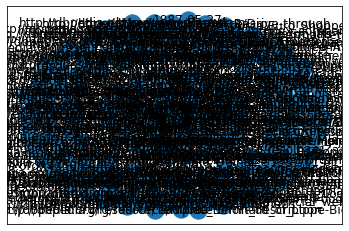

In [7]:
# Triple store (ALBERT HEIJN) van dbpedia omgezet naar een Networkx graph.

g=Graph()
g.parse('https://dbpedia.org/resource/Albert_Heijn')

gres = rdflib_to_networkx_graph(g)
nx.draw_networkx(gres)
type(gres), len(gres.nodes), list(gres.edges)[:2]

# Deel 4 SPARQL <a class="anchor" id="Deel_4_SPARQL"></a> 
#### 4.1 Wat is SPARQL en waarvoor kan het gebruikt worden? <a class="anchor" id="4_1_Wat_is_SPARQL_en_waarvoor_kan_je_het_gebruiken?"></a>

SPARQL (SPARQL Protocol and RDF Query Language) is een zoektaal voor RDF. Een query kan je zien als een soort zoekopdracht die je de computer laat doen in een database. Met SPARQL is het dus mogelijk om items in een RDF database op te vragen. Wanneer je bijvoorbeeld wil nagaan welke items in de RDF database een Nederlands persoon zijn met blond haar, dan kun je die specifieke vraag in de query zetten, waarna het al de Blonde Nederlandse mensen in de database geeft. Je zou kunnen vragen om alleen hun naam, maar ook om hun leeftijd of woonplaats. Als het maar in de database staat, anders geeft de query voor die bepaalde waardes niks terug.

#### 4.2 Hoe werkt de SPARQL syntax in RDFlib? <a class="anchor" id="4_2_Hoe_werkt_de_SPARQL_syntax_in_RDFlib?"></a>

Laten we beginnen met een simpel voorbeeld van een SPARQL query in RDFlib, zodat we het op een makkelijke manier kunnen uitgeleggen. Neem als voorbeeld deze query:

<center><img src="https://i.ibb.co/Qk0NSv3/query.png"></center><br>


* *qres* is simpelweg een naam voor de variabele zodat de query later nog makkelijk kan worden gebruikt. 
* *g.query*: '*g*' is de naam van de RDF database waar de query op gedaan wordt en daarna heb je de naam *query*, van de functie zelf. 
* De gehele query staat tussen driedubbele aanhalingstekens, wanneer je met SPARQL en RDFlib werkt. 
* *SELECT* is een keyword waarmee je kan selecteren welke informatie je precies uit de database wil ophalen. In de query hierboven zijn dat namen van twee verschillende Resources.
* *DISTINCT* zorgt ervoor dat je geen dubbele query resultaten zult hebben.
* *WHERE* gebruik je om te definiëren aan welke eisen de query moet voldoen. In de query hierboven moeten de Resources elkaar kennen en worden daarna de namen van beide Resources opgehaald om die terug te geven.
* *foaf:knows* is een vorm van een Property die aanduidt dat het subject, het object kent.
* *foaf:name* is een vorm van een Property waarmee de naam van een Resource wordt geselecteerd.

In [9]:
# Queries uitgevoerd op de familie database

db = networkx2RDF(G)
db.bind("", ns)

man_qres = db.query("""SELECT DISTINCT ?o ?p ?s WHERE { ?o ?p 'M' }""")
vrouw_qres = db.query("""SELECT DISTINCT ?o ?p ?s WHERE { ?o ?p 'V' }""")

vaders = db.query("""
        SELECT DISTINCT ?subject
        WHERE { 
        ?subject ?p 'M'.
        ?subject :ouder ?kind
        }""")
moeders = db.query("""
        SELECT DISTINCT ?subject
        WHERE { 
        ?subject ?p 'V' .
        ?subject :ouder ?o
        }""")
opas = db.query("""
        SELECT DISTINCT ?subject
        WHERE { 
        ?subject ?p 'M' .
        ?subject :ouder ?vader .
        ?vader :ouder ?kleinzoon
        }""")
omas = db.query("""
        SELECT DISTINCT ?subject
        WHERE { 
        ?subject ?p 'V' .
        ?subject :ouder ?vader .
        ?vader :relation ?kleinzoon
        }""")
broers = db.query("""
        SELECT DISTINCT ?subject ?broer
        WHERE {
        ?subject ?g 'M' .
        ?vader :ouder ?subject .
        ?vader :ouder ?broer .
        FILTER(?subject != ?broer)
        }""")
zussen = db.query("""
        SELECT DISTINCT ?subject ?zus
        WHERE {
        ?subject ?g 'V' .
        ?vader :ouder ?subject .
        ?vader :ouder ?zus .
        FILTER(?subject != ?zus)
        }""")
ooms = db.query("""
        SELECT DISTINCT ?oom ?object
        WHERE {
        ?oom ?g 'M' .
        ?opa :ouder ?oom .
        ?opa :ouder ?ouder .
        FILTER(?oom != ?ouder)
        ?ouder :ouder ?object
        }""")
tantes = db.query("""
        SELECT DISTINCT ?tante ?object
        WHERE {
        ?tante ?g 'V' .
        ?opa :ouder ?tante .
        ?opa :ouder ?ouder .
        FILTER(?tante != ?ouder)
        ?ouder :ouder ?object
        }""")
neven = db.query("""
        SELECT DISTINCT ?neef ?object
        WHERE {
        ?neef ?g 'M' .
        ?opa :ouder ?ouder .
        ?opa :ouder ?oom .
        FILTER(?oom != ?ouder) .
        ?ouder :ouder ?neef .
        ?oom :ouder ?object .
        }""")
nichten = db.query("""
        SELECT DISTINCT ?nicht ?object
        WHERE {
        ?nicht :gender 'V' .
        ?opa :ouder ?ouder .
        ?opa :ouder ?oom .
        FILTER(?oom != ?ouder) .
        ?ouder :ouder ?nicht .
        ?oom :ouder ?object .
        }""")

# Tester om te kijken wat er uit komt
for subj in nichten:
    print(subj)

# Print een aantal relevante netwerk maten.
qres = db.query("""SELECT DISTINCT ?o ?p ?s WHERE {?o ?p ?s}""")

type(qres), len(qres), list(qres)[:2]

(rdflib.plugins.sparql.processor.SPARQLResult,
 471,
 [(rdflib.term.URIRef('Theo_Streng'),
   rdflib.term.URIRef('opa'),
   rdflib.term.URIRef('Max_Verweij')),
  (rdflib.term.URIRef('Edith_Streng'),
   rdflib.term.URIRef('moeder'),
   rdflib.term.URIRef('Christine_Streng'))])

In [8]:
# Queries uitgevoerd op de LHBTQI+ database

db = networkx2RDF(H)
q = db.query("""SELECT DISTINCT ?o ?p ?s WHERE { ?o ?p ?s }""")
for x in q:
    print(x)

(rdflib.term.URIRef('Quintin_Ueer'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'), rdflib.term.Literal('M'))
(rdflib.term.URIRef("Agaath_de_'Bisch"), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'), rdflib.term.Literal('IV'))
(rdflib.term.URIRef('Johanna_Verweijfd'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'), rdflib.term.Literal('Trans'))
(rdflib.term.URIRef('Marie-Louise'), rdflib.term.URIRef('houdt_van'), rdflib.term.URIRef('Alex_Allebijnenburg'))
(rdflib.term.URIRef("Agaath_de_'Bisch"), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'), rdflib.term.Literal('V'))
(rdflib.term.URIRef('Minder_mooie_knul'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'), rdflib.term.Literal('Homo'))
(rdflib.term.URIRef('Marie-Louise'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'), rdflib.term.Literal('V'))
(rdflib.term.URIRef("Agaath_de_'B

# Deel 5 Kennis Quiz <a class="anchor" id="Deel_5"></a>

Hieronder staat in code een korte quiz waarmee je je kennis kan testen. In de cel daaronder kunnen de gegeven antwoorden getest worden.

In [10]:
antwoorden_student = []

print('Vraag 1: Noem één van de belangrijke beperkingen die met RDF schema kan opleggen?')
antwoord = input("Geef hier je antwoord:")
antwoorden_student.append(antwoord.lower())

print('Vraag 2: Waar zou je een edge uit NetworkX, mee kunnen vergelijken in RDF?')
antwoord = input("Geef hier je antwoord:")
antwoorden_student.append(antwoord.lower())

print('Vraag 3: Naast edges, is er nog een onderdeel dat je zou kunnen definiëren in RDF, wat is dit onderdeel in NetworkX? (tip: het kunnen bijvoorbeeld eigenschappen zijn)')

antwoord = input("Geef hier je antwoord:")
antwoorden_student.append(antwoord.lower())

Vraag 1: Noem één van de belangrijke beperkingen die met RDF schema kan opleggen?
Geef hier je antwoord:d
Vraag 2: Waar zou je een edge uit NetworkX, mee kunnen vergelijken in RDF?
Geef hier je antwoord:d
Vraag 3: Naast edges, is er nog een onderdeel dat je zou kunnen definiëren in RDF, wat is dit onderdeel in NetworkX? (tip: het kunnen bijvoorbeeld eigenschappen zijn)
Geef hier je antwoord:d


In [12]:
antwoorden = [['subklasse', 'subproperty', 'domein restrictie', 'range restrictie'], 
              ['predicaat', 'predicate', 'property', 'properties'], 
              ['attribuut', 'attribute', 'attributes', 'node attributes']]

m, n = 0, 0
for antwoord_s, antwoord in zip(antwoorden_student, antwoorden):
    n += 1
    if antwoord_s in antwoord:
        m += 1
        print('Vraag', n, 'goed!')
print('Aantal vragen goed:', m,'/ 3')

Aantal vragen goed: 0 / 3
